In [1]:
using DelimitedFiles
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
# test mô hình với bộ dữ liệu nhiệt độ fober
A= readdlm("data/fober.txt", ' ',Float64,'\n')

17×2 Array{Float64,2}:
 194.5  20.79
 194.3  20.79
 197.9  22.4
 198.4  22.67
 199.4  23.15
 199.9  23.35
 200.9  23.89
 201.1  23.99
 201.4  24.02
 201.3  24.01
 203.6  25.14
 204.6  26.57
 209.5  28.49
 208.6  27.76
 210.7  29.04
 211.9  29.88
 212.2  30.06

In [5]:
# tạo matrix X trainning
tem=A[:,1];
pressure=A[:,2];

In [6]:
y_length= length(pressure)
y=pressure
X= [ones(y_length) tem]

17×2 Array{Float64,2}:
 1.0  194.5
 1.0  194.3
 1.0  197.9
 1.0  198.4
 1.0  199.4
 1.0  199.9
 1.0  200.9
 1.0  201.1
 1.0  201.4
 1.0  201.3
 1.0  203.6
 1.0  204.6
 1.0  209.5
 1.0  208.6
 1.0  210.7
 1.0  211.9
 1.0  212.2

In [7]:
# xây dựng hàm train model
function train(X,y)
    # công thức tính theta của mô hình theta= (X'*X)^-1*X'*y
    θ=inv(X'*X)*X'*y
    return θ
end

train (generic function with 1 method)

In [8]:
# theta ứng với bộ dữ liệu fober
θ= train(X,y)

2-element Array{Float64,1}:
 -81.06372712863569
   0.522892400784523

In [9]:
a=X[1, :]
b=X[y_length,:]
u= a'*θ
v= b'*θ

29.894040317840094

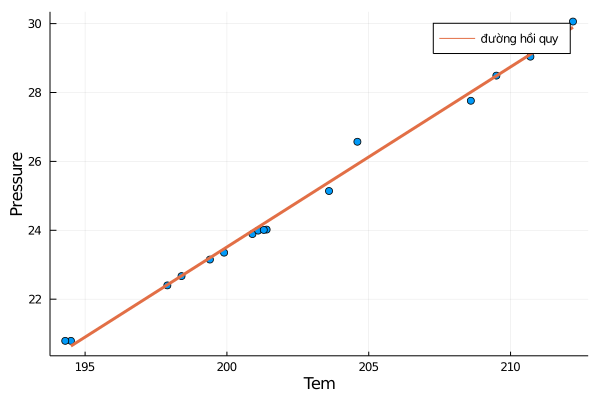

In [10]:
# vẽ minh họa lên đồ thị với bộ dữ liệu fober
plot(tem, pressure, label="", seriestype=:scatter, xlabel="Tem", ylabel="Pressure")
plot!([a[2], b[2]], [u, v], lw=3, label="đường hồi quy")

In [11]:
# demo với bộ dữ liệu ung thư
B= readdlm("data/wdbc.txt",',', Float64,'\n')

569×32 Array{Float64,2}:
 842302.0        0.0  17.99   10.38  …  0.7119  0.2654   0.4601  0.1189
 842517.0        0.0  20.57   17.77     0.2416  0.186    0.275   0.08902
      8.43009e7  0.0  19.69   21.25     0.4504  0.243    0.3613  0.08758
      8.43483e7  0.0  11.42   20.38     0.6869  0.2575   0.6638  0.173
      8.43584e7  0.0  20.29   14.34     0.4     0.1625   0.2364  0.07678
 843786.0        0.0  12.45   15.7   …  0.5355  0.1741   0.3985  0.1244
 844359.0        0.0  18.25   19.98     0.3784  0.1932   0.3063  0.08368
      8.44582e7  0.0  13.71   20.83     0.2678  0.1556   0.3196  0.1151
 844981.0        0.0  13.0    21.82     0.539   0.206    0.4378  0.1072
      8.4501e7   0.0  12.46   24.04     1.105   0.221    0.4366  0.2075
 845636.0        0.0  16.02   23.24  …  0.1459  0.09975  0.2948  0.08452
      8.461e7    0.0  15.78   17.89     0.3965  0.181    0.3792  0.1048
 846226.0        0.0  19.17   24.8      0.3639  0.1767   0.3176  0.1023
      ⋮                            

In [12]:
# lấy 10 đặc trưng đầu tiên và tạo thành matrix train
B_feature=B[:,3:12];
y_ungthu=B[:,2];

In [13]:
X_train=[ones(length(y_ungthu)) B_feature]

569×11 Array{Float64,2}:
 1.0  17.99   10.38  122.8   1001.0  …  0.3001   0.1471   0.2419  0.07871
 1.0  20.57   17.77  132.9   1326.0     0.0869   0.07017  0.1812  0.05667
 1.0  19.69   21.25  130.0   1203.0     0.1974   0.1279   0.2069  0.05999
 1.0  11.42   20.38   77.58   386.1     0.2414   0.1052   0.2597  0.09744
 1.0  20.29   14.34  135.1   1297.0     0.198    0.1043   0.1809  0.05883
 1.0  12.45   15.7    82.57   477.1  …  0.1578   0.08089  0.2087  0.07613
 1.0  18.25   19.98  119.6   1040.0     0.1127   0.074    0.1794  0.05742
 1.0  13.71   20.83   90.2    577.9     0.09366  0.05985  0.2196  0.07451
 1.0  13.0    21.82   87.5    519.8     0.1859   0.09353  0.235   0.07389
 1.0  12.46   24.04   83.97   475.9     0.2273   0.08543  0.203   0.08243
 1.0  16.02   23.24  102.7    797.8  …  0.03299  0.03323  0.1528  0.05697
 1.0  15.78   17.89  103.6    781.0     0.09954  0.06606  0.1842  0.06082
 1.0  19.17   24.8   132.4   1123.0     0.2065   0.1118   0.2397  0.078
 ⋮             

In [14]:
θ_ungthu= train(X_train, y_ungthu)

11-element Array{Float64,1}:
  3.0520842486177546
 -0.4900122933399993
 -0.021973203109979293
  0.054974677835095034
  0.0009547714113002782
 -1.9408621097551044
 -0.09726080782528057
 -0.8097675232549887
 -6.431011461418055
 -1.0119000433107104
  0.11929241916460587

In [15]:
# xây dựng hàm phân loại
function predict(Xnew, θ, ϕ=0.5)
    ŷ=Xnew'*θ
    if ŷ>ϕ
        return 1
    else 
        return 0
    end
end

predict (generic function with 2 methods)

In [16]:
ŷ= predict(X_train[100,:],θ_ungthu)

1

In [17]:
# xây dựng accurasy
ŷ= map(i -> predict(X_train[i,:],θ_ungthu), 1:length(y_ungthu))

569-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 1

In [18]:
# độ chính xác của mô hình trên
sum(y_ungthu.==ŷ)/length(ŷ)

0.9384885764499121